## Student Name 

###### Sonam Mehra
###### Ray Lee
###### Opeoluwa Mosuro
######Ganesh Prasad Neupane
###### Jupsimar Singh


In [ ]:
# importing the libraries
import json
import requests
import pandas as pd
from pandas import json_normalize
import seaborn as sns
import matplotlib.pyplot as plt


## Working with COVID data

In [ ]:
#endpoint
url ='https://api.covid19api.com/summary'

In [ ]:
response = requests.get(url).json()
response

In [ ]:
print(response.keys())

In [ ]:
#converts Json dictonary to dataframe
recs = response['Countries']
#normalize function is used to flatten data
df = json_normalize(recs)

df.head()

In [ ]:
#drop the column not needed
df.drop(['ID'],axis=1,inplace=True)

In [ ]:
#set index as country
df.set_index('Country')

# Save dataset into csv file


In [ ]:
df.to_csv("Covid.csv")

## Question1 : Plot 10 countries with highest total confirmed covid cases.


In [ ]:
#subset dataframe for relevant data for chart
df_10 = df.nlargest(10,'TotalConfirmed')[['Country','TotalConfirmed']]
#seaborn
sns.set_color_codes("muted")
#barplot
sns.barplot(x='Country', y = 'TotalConfirmed', data=df_10, color='b').set_title("Top 10 Countries for Total Confirmed Cases")
plt.xticks(rotation=90)
plt.show()

# Working with Yelp Data

In [ ]:
#api key for the yelp
api_key='edzpO5GSEJgeyIQ9KXU1uUmrvBvvzcIIzV5zpw0OAf4KFWMG7uPeD2i1wE7LJZRprVJRBYhHTmZdBcWN0pEQVunCvorCPNqlyaGu7Zq-oW16QDsGKJRkvcobGpXtYHYx'



you will need to have your api token stored on Google Drive to connect to yelp

In [ ]:
#endpoint
api_url = 'https://api.yelp.com/v3/businesses/search'

In [ ]:
#passing the parameters to get the response 
params = {"term":"pharmacies", "limit": 50, "location":"Toronto, ON","sort by":"review_count"}
headers = {'Authorization': 'Bearer %s' % api_key}



In [ ]:
#get the response
response = requests.get(api_url, params = params, headers = headers) 

In [ ]:
#loading json 
result=response.json()

print(result)

In [ ]:
#displays keys of the dictonary
result.keys()

In [ ]:
#converts Json dictonary to dataframe
pharm = result['businesses']
#normalize function is used to flatten data
df_pharm = json_normalize(pharm)

df_pharm.head()

In [ ]:
#dropping column not required
df_pharm.drop(['id','alias'],axis=1,inplace=True)


#Save dataframe to CSV File

In [ ]:
df_pharm.to_csv("Pharmacies_Toronto.csv")

#Question Plot the pharmacies having Review count greater than 5



In [ ]:
#filter the dataset according to the question
df_review_count= df_pharm[df_pharm['review_count']>5]
df_review_count

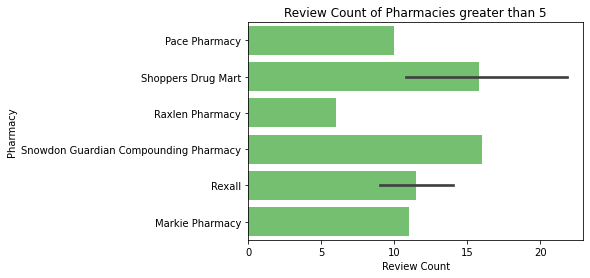

In [ ]:
#plot using seaborn

title = 'Review Count of Pharmacies greater than 5'

fig=sns.barplot(x='review_count', y='name', data=df_review_count, color = 'g').set_title(title)
#set labels
plt.xlabel("Review Count") 
plt.ylabel("Pharmacy")
plt.show(fig)
